In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing

In [ ]:
#reading the data files

In [2]:
df=pd.read_csv("cgfinal414.csv")

In [3]:
df_cgd=df.iloc[:,:-5]

In [4]:
df_cgd=df_cgd.dropna()

In [5]:
df_cgd=df_cgd.drop(['id'],axis=1)

In [ ]:
#basic data description

In [6]:
df_cgd.describe()

,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,TTC5,...,ImpairedPolypharmacy,cognition,nutrition,phy_performance,function,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,cgdistress
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,66.527638,0.248744,2.570352,1.839196,1.135678,1.550251,1.424623,2.253769,1.947236,0.680905,...,0.841709,0.341709,0.620603,0.937186,0.605528,0.625628,0.266332,0.216080,0.394472,0.432161
std,12.368319,0.432829,0.625910,0.733695,0.439468,0.527565,0.660583,0.820655,0.332504,0.466713,...,0.365473,0.474879,0.485848,0.242934,0.489352,0.484569,0.442596,0.412088,0.489352,0.496000
min,26.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,92.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:

one_hot = pd.get_dummies(df_cgd['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

import matplotlib.pyplot as plt

In [8]:
one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)

In [9]:
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)

In [10]:
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)

In [11]:
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)

In [12]:
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)

In [13]:
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

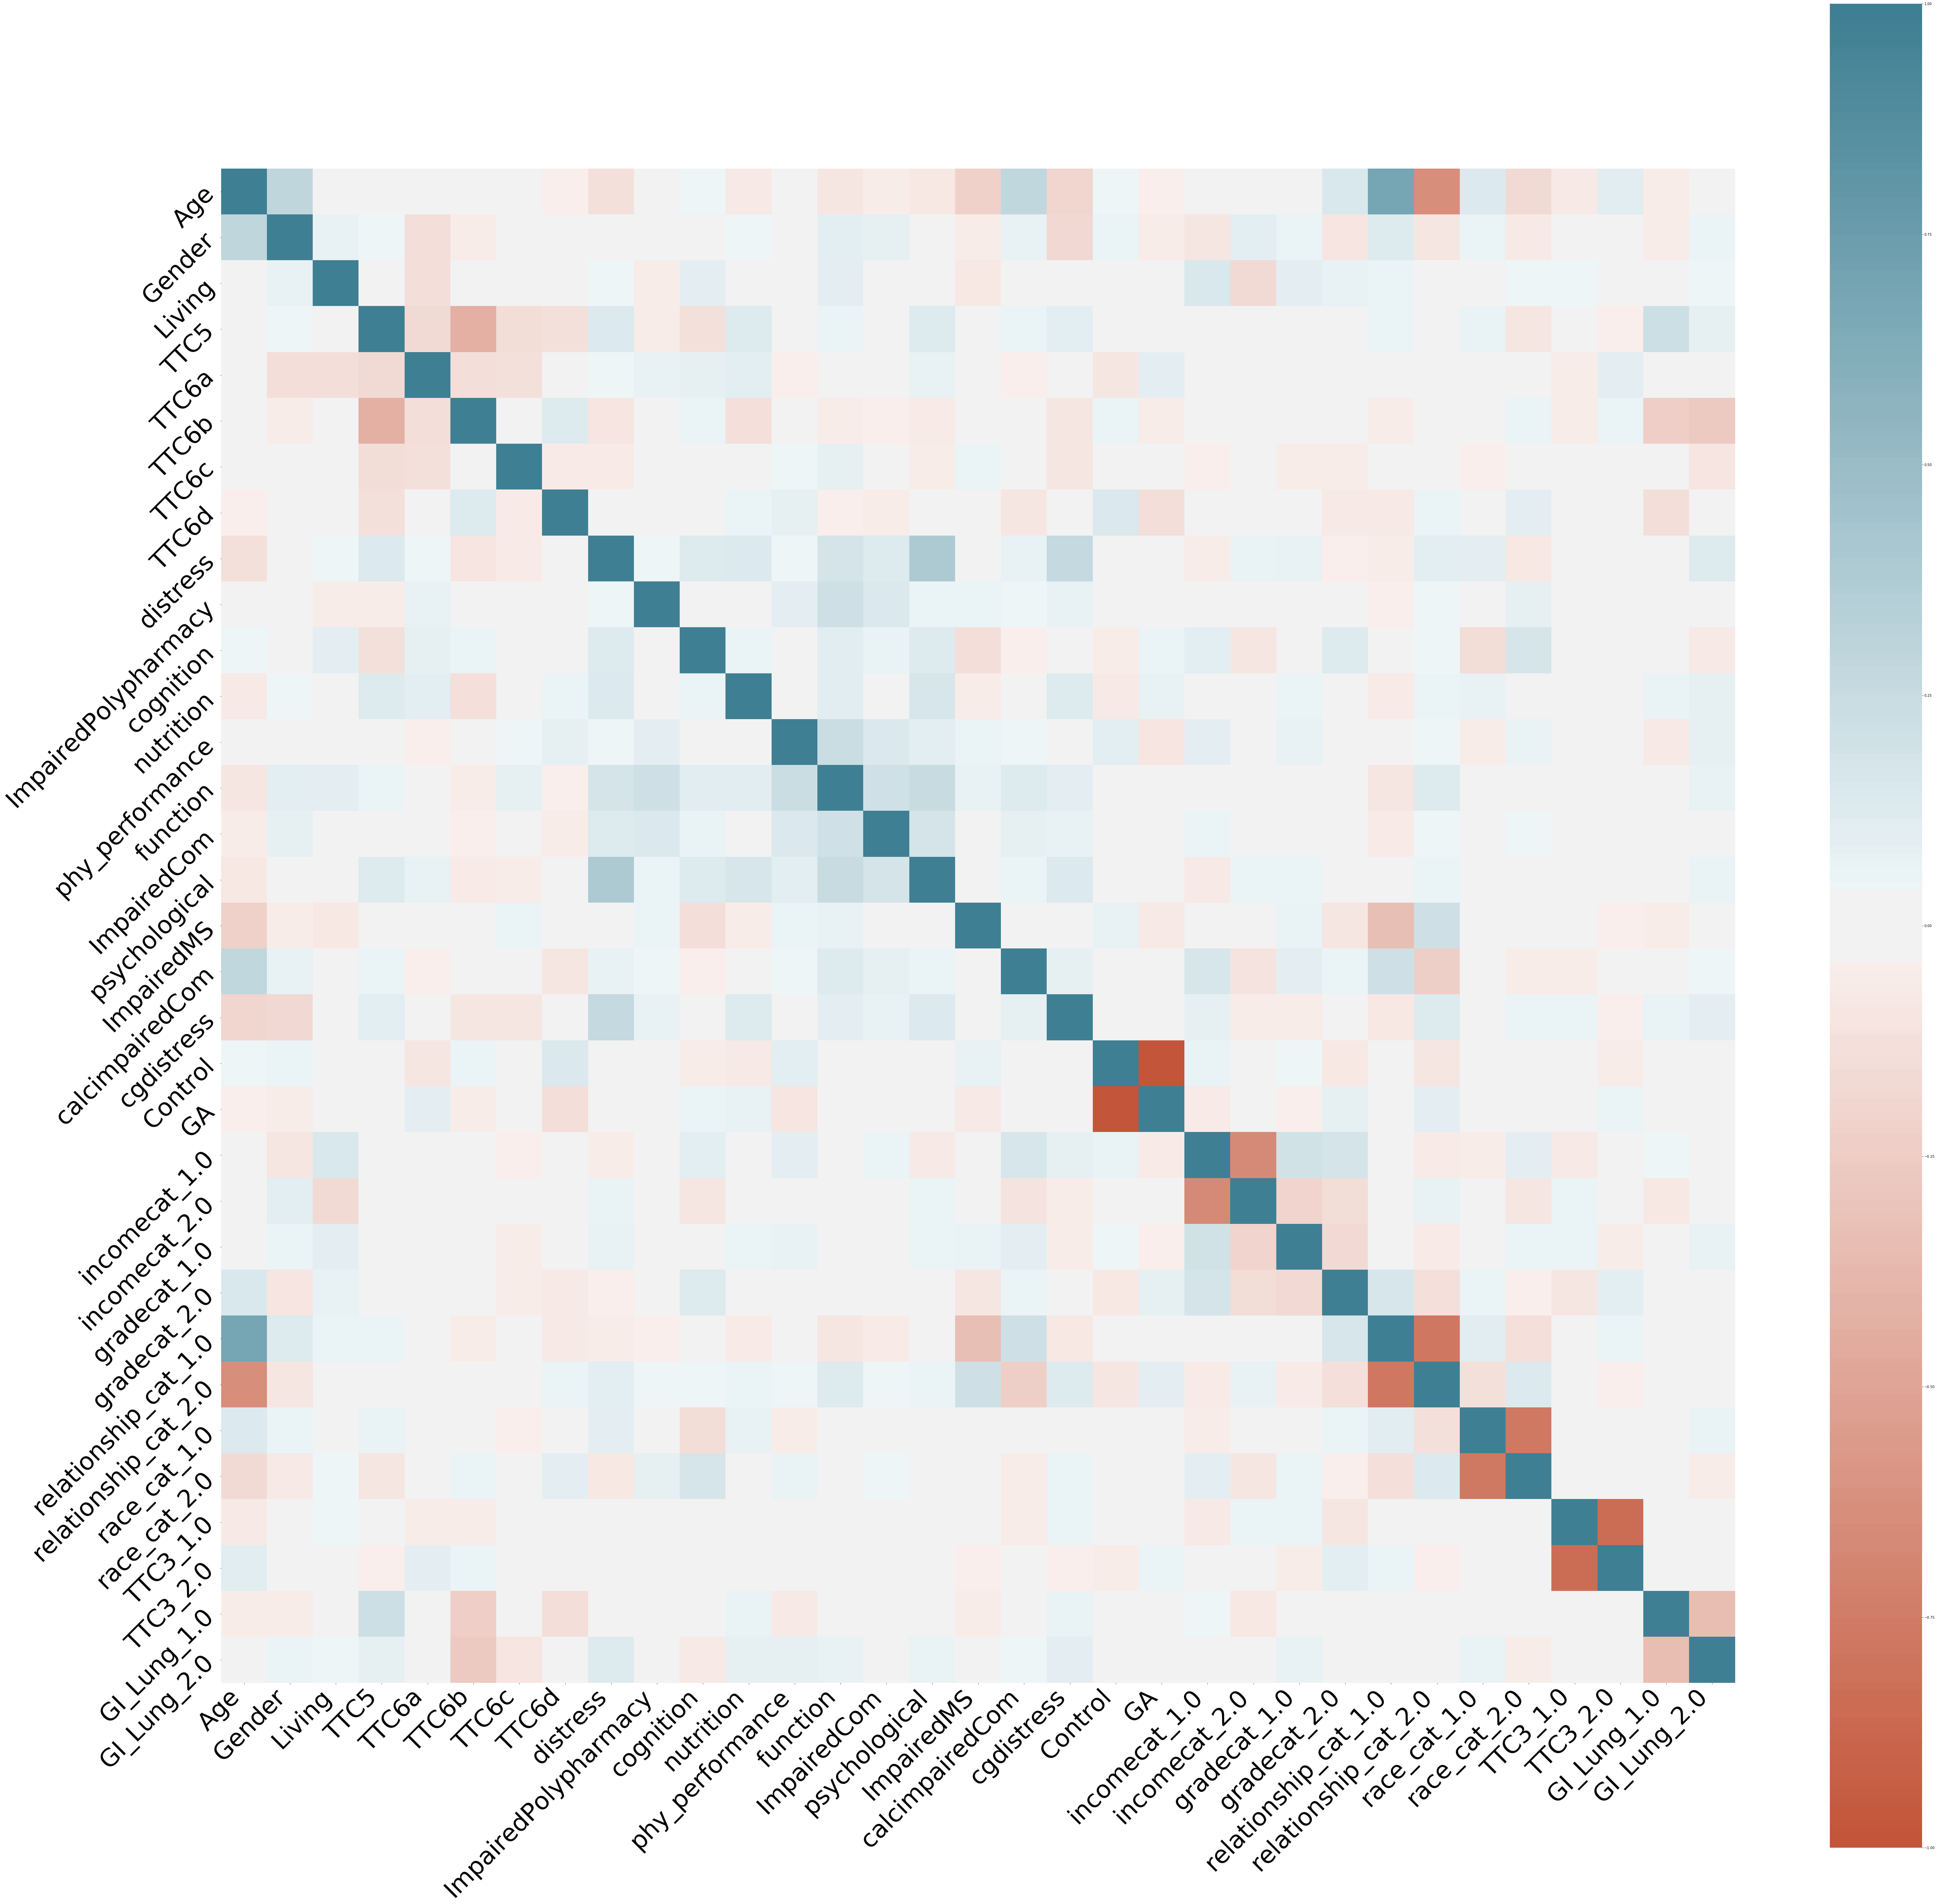

In [14]:
plt.figure(figsize = (100,100))
corr = df_cgd.corr(method='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=72
);
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=72
);
       

In [15]:
df_cgd.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'Control', 'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0'], dtype=object)

Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

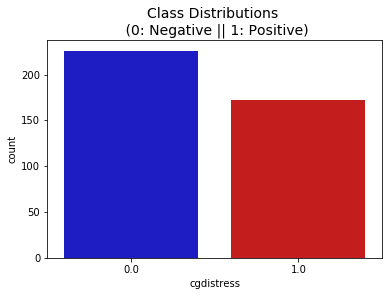

In [16]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( 'cgdistress', data=df_cgd, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

# PCA

T-SNE took 1.7 s
PCA took 0.54 s
Truncated SVD took 0.053 s


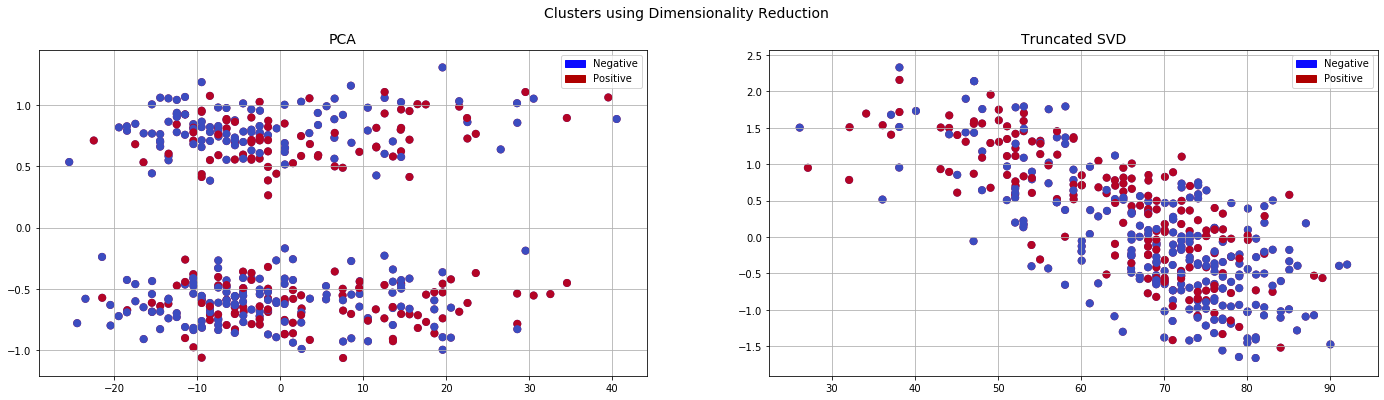

In [17]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = df_cgd.drop('cgdistress', axis=1)
y = df_cgd['cgdistress']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# Feature selection and spliting data

In [18]:
dtrain=df_cgd

features_selected =['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 
       'Control', 'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']

Xtrain = []
for i in features_selected:
    Xtrain.append(dtrain[i].values)

Xtrain = np.array(Xtrain)
Xtrain=Xtrain.T
predicted_feature = ['cgdistress']
Ytrain= []
for i in predicted_feature:
    Ytrain.append(dtrain[i].values)


Ytrain = np.array(Ytrain)
Ytrain=Ytrain.T.ravel()

In [19]:
Ytrain.shape

(398,)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xtrain,Ytrain,random_state=36,test_size=0.25)

# SVM

In [23]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
modelsvm = SVC(random_state=42, verbose=2,probability=True)



param_gridsvm = {'C': [0.1, 1, 10,20,50, 100,200,500,1000, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005],  
              'gamma': [10,20,50, 100,200,500,1000,1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005], 
              'kernel': ['rbf']}  


svmgridsearch = GridSearchCV(estimator=modelsvm, param_grid=param_gridsvm, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="accuracy")

svmgridsearch.fit(X_train,y_train)

df_gridsearchsvm = pd.DataFrame(svmgridsearch.cv_results_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:    6.5s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 1177 out of 1200 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    6.7s finished


In [24]:
pd.set_option('display.max_rows',500)

In [25]:
svmgridsearch.best_params_

{'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}

In [26]:
svmgridsearch.best_score_

0.6410734463276836

In [27]:
svmgridsearch.score(X_test,y_test)

0.66

In [28]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
modelsvm = SVC(random_state=42, verbose=2)



param_gridsvm = {'C': np.arange(1,1000,1),  
              'gamma':np.arange(0.0001,0.001,0.0001), 
              'kernel': ['rbf']}  


svmgridsearch = GridSearchCV(estimator=modelsvm, param_grid=param_gridsvm, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="accuracy")

svmgridsearch.fit(X_train,y_train)

df_gridsearchsvm = pd.DataFrame(svmgridsearch.cv_results_)
svmgridsearch.best_score_
svmgridsearch.score(X_test,y_test)

Fitting 5 folds for each of 8991 candidates, totalling 44955 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4280 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 8808 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 14648 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 21768 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 30200 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 39912 tasks      | elapsed:   55.1s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 44955 out of 44955 | elapsed:  1.1min finished


0.65

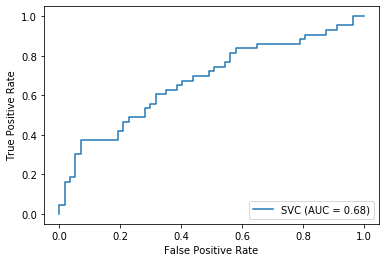

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svmgridsearch.best_estimator_, X_test, y_test)
plt.show()

In [222]:
df_gridsearchsvm.to_csv("result_svm.csv")

In [225]:
X_train.shape

(298, 32)

In [196]:
!pip install imblearn

# a systematic grid seach try for rf

In [197]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC 


from sklearn.model_selection import GridSearchCV

In [250]:
X_train,X_test,y_train,y_test = train_test_split(Xtrain,Ytrain,random_state=36,test_size=0.2)

In [251]:
listresults=[]

In [253]:

def evaluate_model(model, model_name, params):
    
    grid_search = GridSearchCV(model,params,cv=5,n_jobs=-1, verbose=5, return_train_score=True,scoring="accuracy")
    grid_search.fit(X_train,y_train)
    
    
    test_score=grid_search.score(X_test,y_test)
    listresults.append(pd.DataFrame(grid_search.cv_results_))
    print('Classifier')
    print(model_name)
    print('Test Score')
    print(test_score)
    print("CV Score")
    print(grid_search.best_score_)
    print("best params")
    print(grid_search.best_params_)

In [261]:
listresults[0].to_csv("correctrf.csv")

In [82]:


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([
            (RandomForestClassifier(), model_names[0], param_grid_rf),
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['RF']

# the training parameters of each model
param_grid_rf = [{
        'max_features': ['auto', 'sqrt',0.05, 0.07,0.13, 0.15, 0.19, 0.25,0.02,0.03],
        'n_estimators': [10, 15, 25,30,35,45, 60,110, 148, 200],
        'min_samples_split': [2, 3, 5,6,7],
         'min_samples_leaf': [1, 2, 3,4,5,6],
        'bootstrap': [True],
        'max_depth': [3,5,7,8,10, 20, 30, 40,None]
       }]


In [83]:
np.arange(1,50,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [256]:
for m in init_classifiers():
    evaluate_model(m[0], m[1], m[2])

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 4284 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6012 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6984 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9144 tasks      |

Classifier
RF
Test Score
0.6375
CV Score
0.6984126984126984
best params
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 35}


# evaluating the best set of parameters for RF

In [142]:
global grid_search1
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
listaaa=[]
def evaluate_model(model, model_name, params):
    
    grid_search1 = GridSearchCV(model,params,cv=5,n_jobs=-1, verbose=5, return_train_score=True,scoring="accuracy")
    grid_search1.fit(X_train,y_train)
    
    
    test_score=grid_search1.score(X_test,y_test)
    print('Classifier')
    print(model_name)
    print('Test Score')
    print(test_score)
    print("best params")
    print(grid_search1.best_params_)   
    y_pred = grid_search1.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    listaaa.append(grid_search1.best_estimator_)
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([
            (RandomForestClassifier(), model_names[0], param_grid_rf),
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['RF']

# the training parameters of each model
param_grid_rf = [{
        'max_features': ['sqrt'],
        'n_estimators': [35],
        'min_samples_split': [ 3],
         'min_samples_leaf': [1],
        'bootstrap': [True],
        'max_depth': [40],
        'random_state':[16]
       }]


In [143]:
X_train,X_test,y_train,y_test = train_test_split(Xtrain,Ytrain,random_state=21,test_size=0.2)

for m in init_classifiers():
    evaluate_model(m[0], m[1], m[2])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Classifier
RF
Test Score
0.6875
best params
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 35, 'random_state': 16}
[[39 12]
 [13 16]]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


# Systematic gridsearch for Logit, KNN, Adaboost

In [ ]:


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([
            (RandomForestClassifier(), model_names[0], param_grid_rf),
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['RF']

# the training parameters of each model
param_grid_rf = [{
        'max_features': ['auto', 'sqrt',0.05, 0.07,0.13, 0.15, 0.19, 0.25,0.02,0.03],
        'n_estimators': [10, 15, 25,30,35,45, 60,110, 148, 200],
        'min_samples_split': [2, 3, 5,6,7],
         'min_samples_leaf': [1, 2, 3,4,5,6],
        'bootstrap': [True],
        'max_depth': [3,5,7,8,10, 20, 30, 40,None]
       }]


In [201]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([
            (LogisticRegression(), model_names[0], param_grid_logistic),
            (KNeighborsClassifier(), model_names[1], param_grid_knn),
            (DecisionTreeClassifier(), model_names[2], param_grid_tree),
            (AdaBoostClassifier(), model_names[3], param_grid_boost)
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['LR','KNN','Tree','Boosting']

# the training parameters of each model
param_grid_logistic = [{'C':list(np.linspace(0.1,100)), 'penalty':['l1','l2'],'random_state':[42]}]
param_grid_knn = [{'leaf_size':list(np.arange(1,30,1)),'n_neighbors':list(np.arange(1,30,1))}]
param_grid_boost = [{'random_state':[1],'n_estimators':list(np.arange(1,300,2)),'learning_rate':[0.1,1],'random_state':[42]}]
for m in init_classifiers():
    evaluate_model(m[0], m[1], m[2])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
d:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classifier
LR
Test Score
0.64
CV Score
0.6105649717514124
best params
{'C': 0.1, 'penalty': 'l2', 'random_state': 42}
Fitting 5 folds for each of 841 candidates, totalling 4205 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4205 out of 4205 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classifier
KNN
Test Score
0.58
CV Score
0.6170621468926554
best params
{'leaf_size': 15, 'n_neighbors': 9}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Classifier
Tree
Test Score
0.61
CV Score
0.5638418079096045
best params
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 3, 'random_state': 1}
Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:   44.3s


Classifier
Boosting
Test Score
0.69
CV Score
0.6274011299435028
best params
{'learning_rate': 0.1, 'n_estimators': 1, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   51.2s finished


In [210]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([
            (AdaBoostClassifier(), model_names[0], param_grid_boost)
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['Boosting']

# the training parameters of each model
param_grid_boost = [{'random_state':[1],'n_estimators':list(np.arange(1,300,2)),'learning_rate':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.5,0.9,1],'random_state':[42]}]
for m in init_classifiers():
    evaluate_model(m[0], m[1], m[2])

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3780 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4470 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5922 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6696 tasks      |

Classifier
Boosting
Test Score
0.69
CV Score
0.6274011299435028
best params
{'learning_rate': 0.0001, 'n_estimators': 1, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done 8250 out of 8250 | elapsed:  4.7min finished
